In [ ]:
%pip install shap

In [ ]:
# Cell 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import shap


In [5]:
# Cell 2: Simulate dataset
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'Age': np.random.normal(40, 10, n).astype(int),
    'BMI': np.random.normal(44.5, 6.7, n),
    'Waist_Circumference': np.random.normal(170, 20, n),
    'Hip_Circumference': np.random.normal(185, 30, n),
    'Diabetes': np.random.binomial(1, 0.15, n),
    'Hypertension': np.random.binomial(1, 0.25, n),
    'Sex': np.random.binomial(1, 0.75, n)
})
data['SurgeryType'] = (
    (data['Diabetes'] == 1) |
    (data['Age'] > 35) |
    (data['Waist_Circumference'] > 165)
).astype(int)


In [6]:
# Cell 3: Train/test split
X = data.drop(columns=['SurgeryType'])
y = data['SurgeryType']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

[[ 23   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



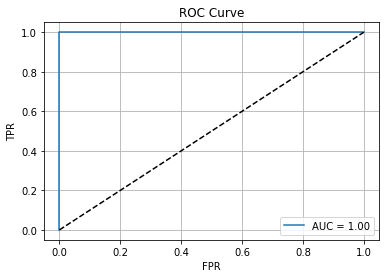

In [7]:
# Cell 4: Evaluation
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


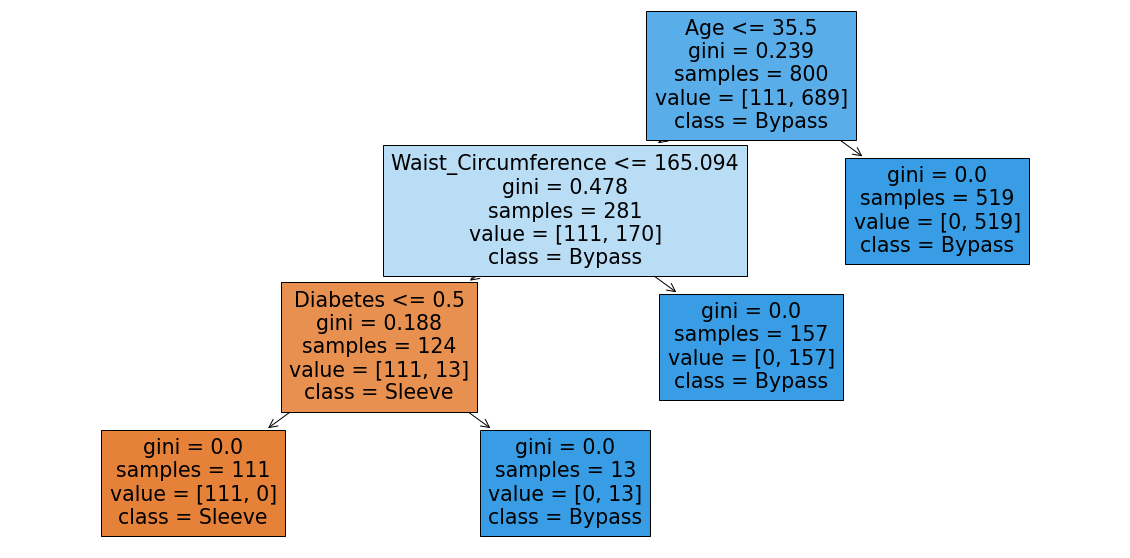

In [8]:
# Cell 5: Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=["Sleeve", "Bypass"], filled=True)
plt.show()


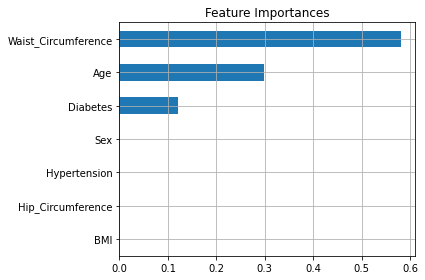

In [9]:
# Cell 6: Tree-based Feature Importances
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.grid(True)
plt.tight_layout()
plt.show()


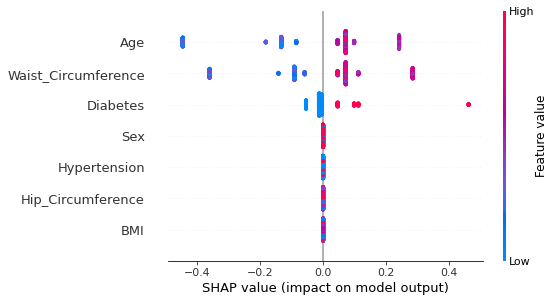

In [10]:
# Cell 7: SHAP with TreeExplainer
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)
